In [3]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import io, transform
from torch.utils.data import Dataset, DataLoader

sns.set(style="white")
plt.rcParams['figure.figsize'] = (12, 10)

In [210]:
train_labels = pd.read_csv("data/train.csv")
train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [211]:
train_labels.shape

(31072, 2)

In [225]:
tmp = train_labels.Target.str.get_dummies(sep=' ')

In [226]:
tmp.columns = map(int, tmp.columns)

In [240]:
train_labels = train_labels.join(tmp.sort_index(axis=1))

In [271]:
tmp1 = train_labels.iloc[:,2:]

In [291]:
co_occur = tmp1.T.dot(tmp1); co_occur

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,12885,600,1735,571,97,806,89,1092,5,0,...,279,614,58,1343,325,802,78,3631,115,7
1,600,1254,147,19,52,39,21,56,0,0,...,11,19,0,76,7,45,1,261,0,0
2,1735,147,3621,4,48,59,79,189,11,0,...,18,56,6,216,52,226,12,782,11,1
3,571,19,4,1561,23,14,24,40,4,0,...,5,20,0,35,16,51,3,272,12,0
4,97,52,48,23,1858,5,2,42,0,0,...,16,16,2,135,24,44,8,329,17,1
5,806,39,59,14,5,2513,14,80,0,0,...,13,27,0,120,20,45,30,555,11,4
6,89,21,79,24,2,14,1008,24,0,11,...,6,4,6,31,2,5,0,151,0,0
7,1092,56,189,40,42,80,24,2822,1,0,...,9,22,0,139,29,7,5,411,1,0
8,5,0,11,4,0,0,0,1,53,0,...,0,0,0,2,0,0,0,2,0,0
9,0,0,0,0,0,0,11,0,0,45,...,0,0,0,0,0,0,0,0,0,0


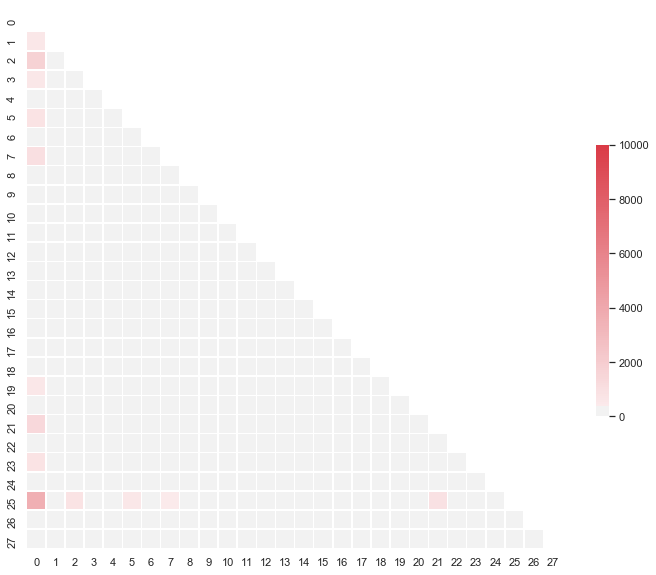

In [347]:
mask = np.zeros_like(co_occur, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(co_occur, mask=mask, cmap=cmap, vmax=10000, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [348]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

In [349]:
co_occur1 = co_occur.apply(np.log, args=10)

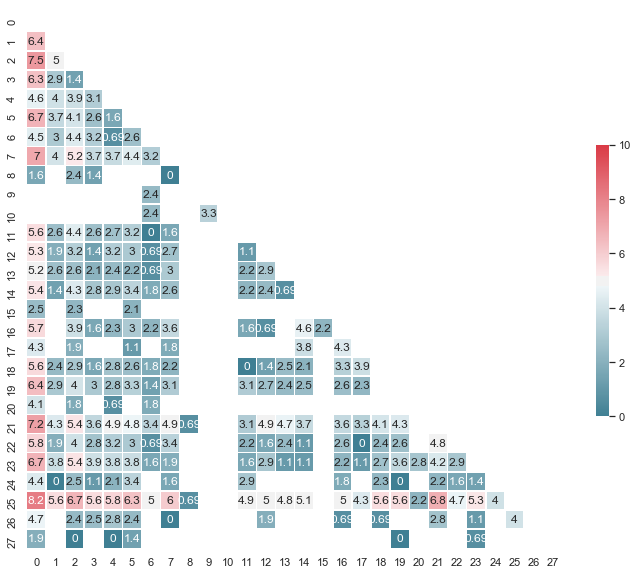

In [350]:
mask = np.zeros_like(co_occur1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(co_occur1, mask=mask, cmap=cmap, vmax=10, vmin=0, center=5,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [354]:
DIR = 'data/train_images'
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

124288


In [356]:
len(train_labels) * 4

124288

In [395]:
id_list = train_labels.sample(4).Id.tolist(); id_list

['7e31e8be-bbb7-11e8-b2ba-ac1f6b6435d0',
 '83866656-bbb1-11e8-b2ba-ac1f6b6435d0',
 '2c6f1476-bbac-11e8-b2ba-ac1f6b6435d0',
 'f7ceb2b8-bbb9-11e8-b2ba-ac1f6b6435d0']

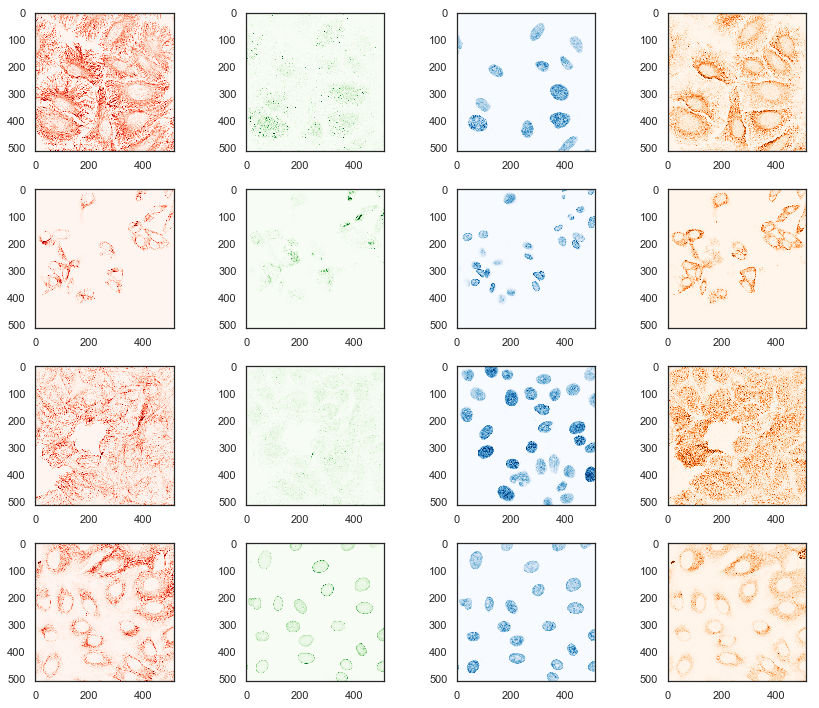

In [402]:
def plot_images_row(img_id, ax_row):
    filters = ['red', 'green', 'blue', 'yellow']
    colormaps = ['Reds', 'Greens', 'Blues', 'Oranges']
    
    for c, ax, cmap in zip(filters, ax_row, colormaps):
        filename = img_id + '_' + c + '.png'
        img=mpimg.imread(os.path.join(DIR, filename))
        imgplot = ax.imshow(img, cmap=cmap)

fig, axes = plt.subplots(nrows=4, ncols=4)

for img_id, ax_row in zip(id_list, axes):
    plot_images_row(img_id, ax_row)
 
plt.tight_layout()

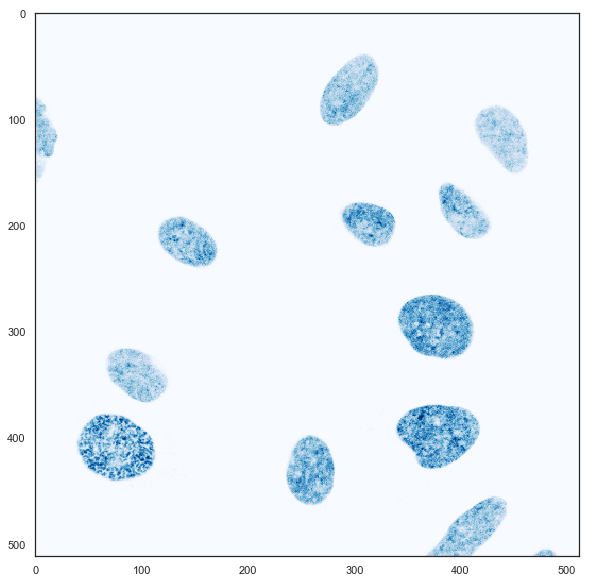

In [413]:
color = 'blue'
filename = id_list[0] + '_' + color + '.png'
img=mpimg.imread(os.path.join(DIR, filename))
plt.imshow(img, cmap="Blues")

In [20]:
class TrainImageDataset(Dataset):
    """Fluorescence microscopy images of protein structures training dataset"""

    def __init__(self, csv_file, image_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            image_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.labels = self.to_one_hot(pd.read_csv(csv_file))
        self.image_dir = image_dir
        self.transform = transform

    def to_one_hot(self, df):
        tmp = df.Target.str.get_dummies(sep=' ')
        tmp.columns = map(int, tmp.columns)
        return df.join(tmp.sort_index(axis=1))
    
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = self.labels.iloc[idx, 0]
        img_red = img_name + '_red.png'
        img_blue = img_name + '_blue.png'
        img_green = img_name + '_green.png'
        img_yellow = img_name + '_yellow.png'
        img_red = io.imread(os.path.join(self.image_dir, img_red))
        img_blue = io.imread(os.path.join(self.image_dir, img_blue))
        img_green = io.imread(os.path.join(self.image_dir, img_green))
        img_yellow = io.imread(os.path.join(self.image_dir, img_yellow))
        labels = self.labels.iloc[idx, 2:].values
        labels = labels.astype('int')
        sample = {'image_red': img_red,
                  'image_blue': img_blue,
                  'image_green': img_green,
                  'image_yellow': img_yellow,
                  'labels': labels}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [21]:
face_dataset = TrainImageDataset(csv_file='data/train.csv',
                                    image_dir='data/train_images')

In [33]:
sample = face_dataset[255]

In [34]:
sample

{'image_red': array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [120,  39,  36, ...,   0,   0,   0],
        [120, 116,  63, ...,   0,   0,   0],
        [ 82,  96,  69, ...,   0,   0,   0]], dtype=uint8),
 'image_blue': array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,  13, 130, ...,   0,   0,   0],
        [  0,   0,  10, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 'image_green': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 3, 9, ..., 0, 0, 0],
        [0, 2, 0, ..., 0, 0, 0],
        [0, 2, 8, ..., 0, 0, 0]], dtype=uint8),
 'image_yellow': array([[ 0,  0, 12, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  4, ...,  0,  0,  0],
   

In [35]:
sample['image_red'].shape == sample['image_blue'].shape == \
sample['image_green'].shape ==  sample['image_yellow'].shape

True

In [36]:
len(sample['labels']) == 28

True

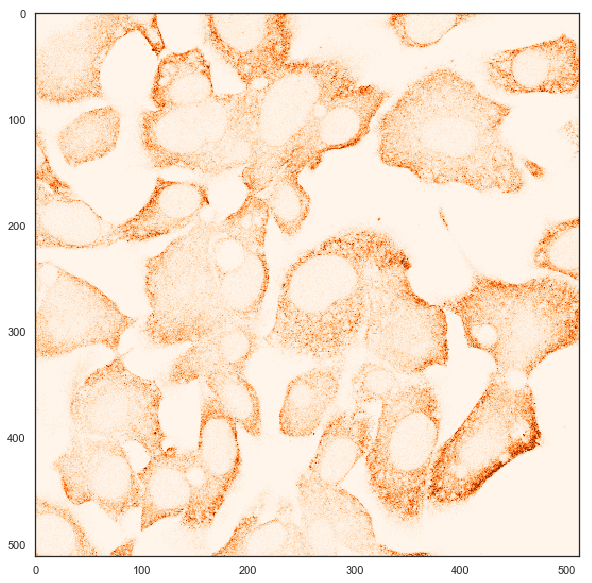

In [38]:
plt.imshow(sample['image_yellow'], cmap="Oranges")